In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from IPython import display
import collections
from time import time
from itertools import chain
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
import seaborn as sns
import qgrid
import datetime
import sympy as S
import scipy

df_listings = pd.read_csv("../seattlelistings.csv")
df_calendar = pd.read_csv("../seattlecalendar.csv")
df_reviews = pd.read_csv("../seattlereviews.csv")

/home/vinay/miniconda3/envs/udacity/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


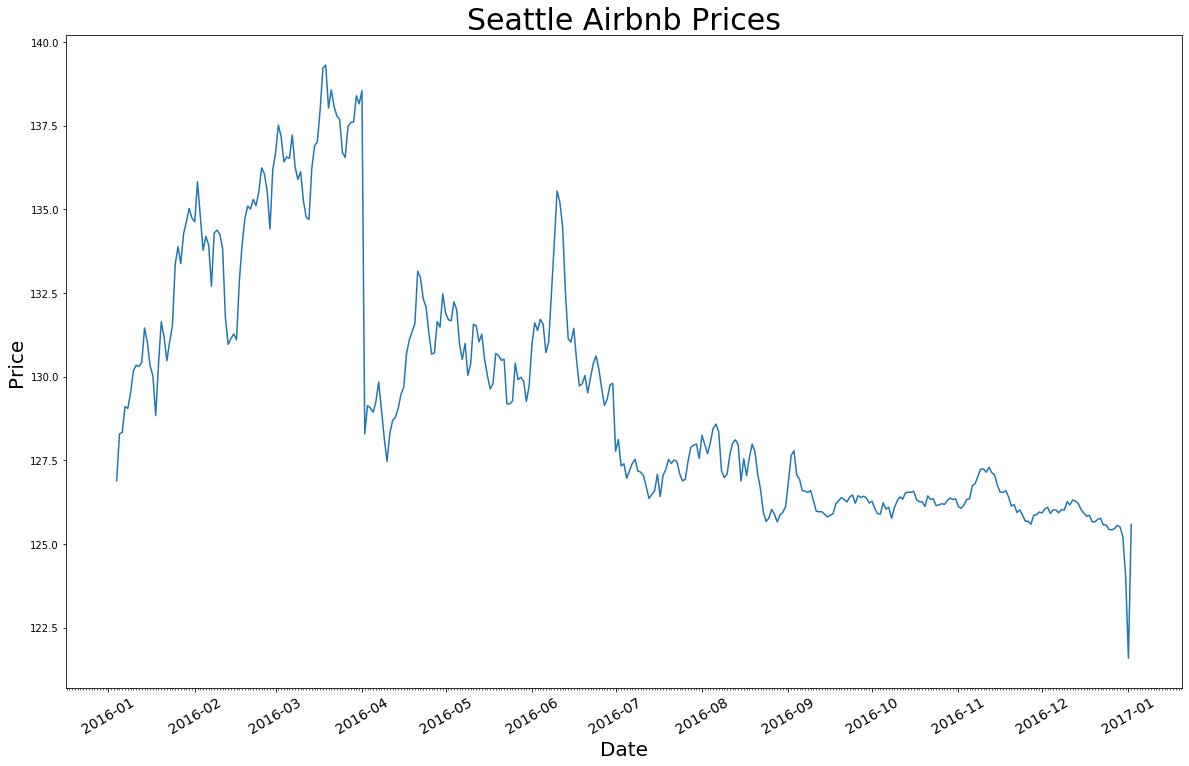

In [2]:
df_calendar.isnull().sum()
df_calendar_clean=df_calendar.drop(columns='price')
df_calendar_clean.rename(columns={'listing_id': 'id'},inplace=True)

# Convert listings price data into string, get subset of listings data
df_listings['price']=df_listings['price'].replace('[\$,]', '', regex=True).astype(float)
df_listings_price=df_listings[['id','price']]

# Join datasets on join column id.
df_result_price = pd.merge(df_calendar_clean, df_listings_price, how='left', on=['id'])

result_price_xavailable=df_result_price[df_result_price['available']=='f']
result_price_xavailable=result_price_xavailable.groupby('date')['price'].mean()

from datetime import datetime
datetime.strptime('2016-01-13', "%Y-%m-%d")

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every day
myFmt = mdates.DateFormatter('%Y-%m')

df=pd.DataFrame({
    'Date': result_price_xavailable.index, 
    'Price':result_price_xavailable.values
})
df["Date"] = pd.to_datetime(df["Date"])

fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(df.Date, df.Price)
ax.xaxis.set_major_formatter(myFmt)
ax.set_title('Seattle Airbnb Prices', fontsize=30)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.xticks(fontsize=14, rotation=30)
#fig.autofmt_xdate()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)
plt.show()